count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64


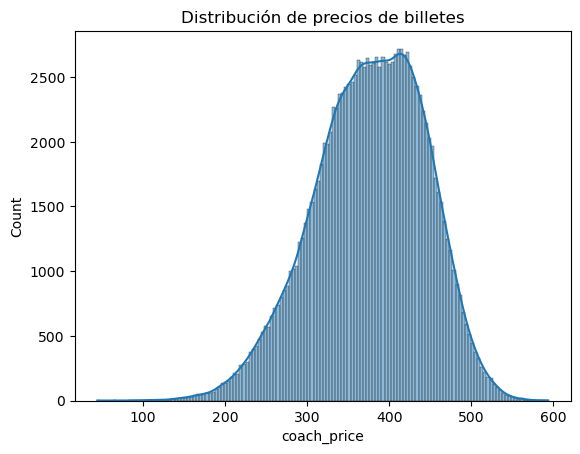

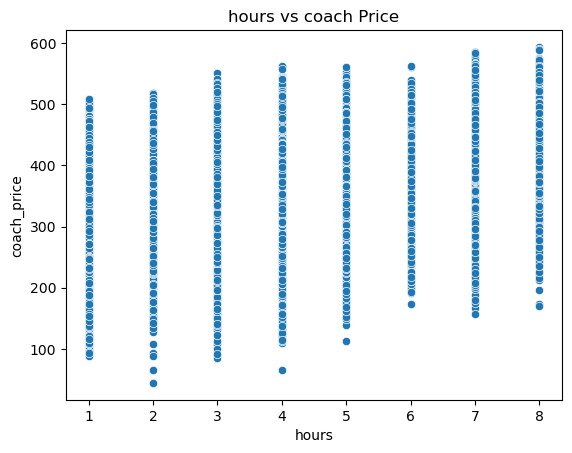

Correlación entre hours y coach_price: 0.34


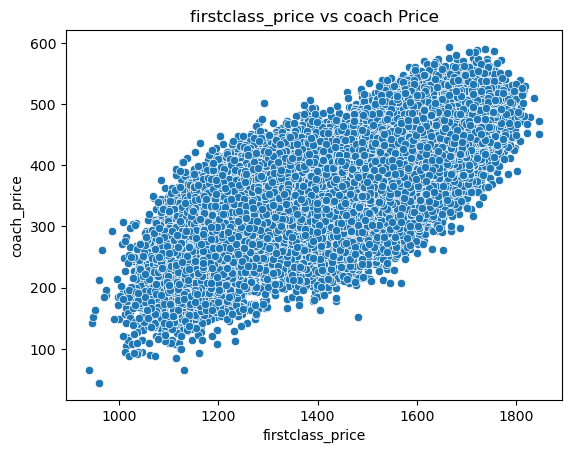

Correlación entre firstclass_price y coach_price: 0.76


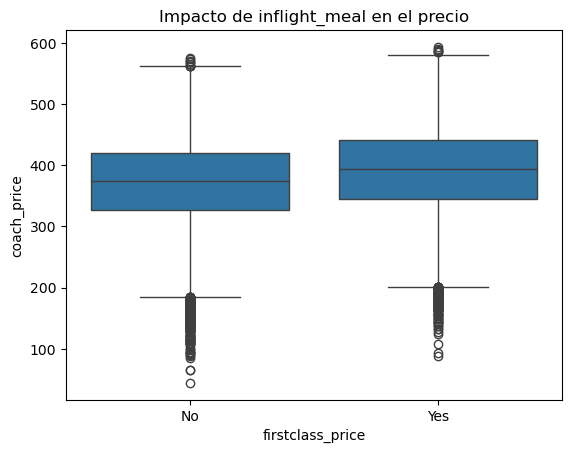

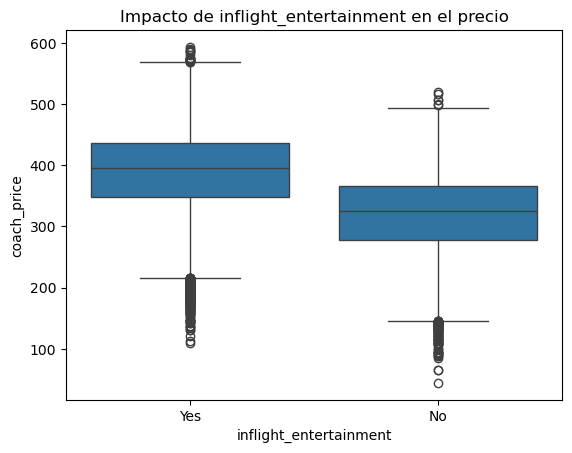

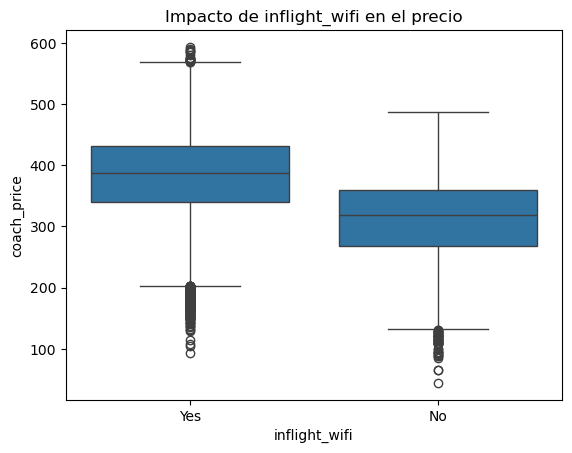

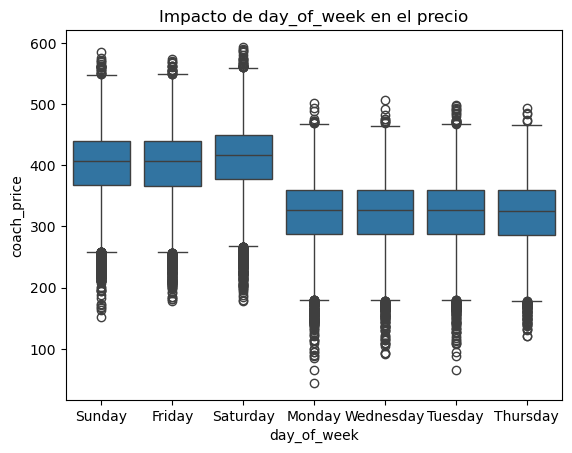

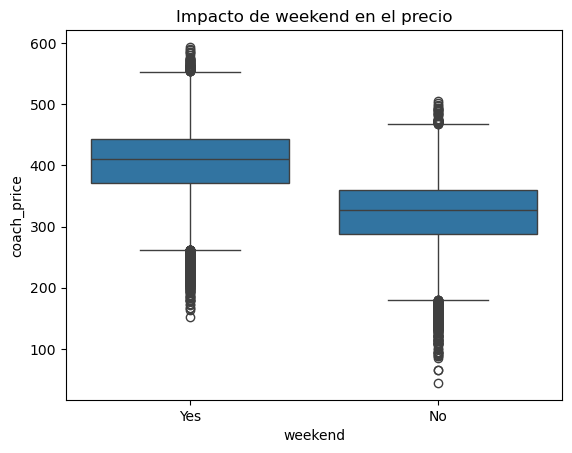

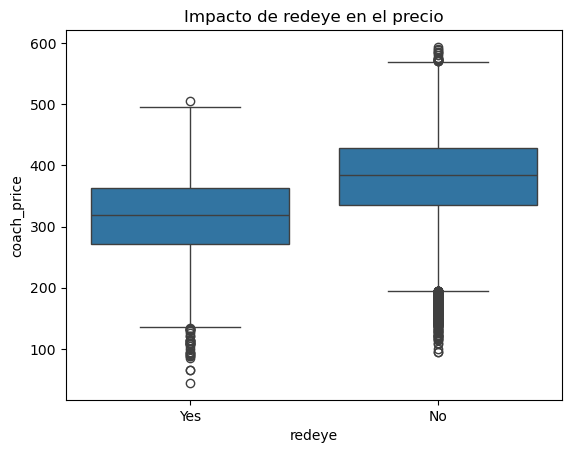

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('U3__flight.csv')

# Actividad Práctica 8 :: Análisis Exploratorio de Precios de 

# Imagina que trabajas para una agencia de viajes y tu aerolínea favorita te ha proporcionado un dataset con datos sobre sus vuelos. 
# Tu objetivo es analizar estos datos para entender qué factores influyen en el precio de los billetes y cómo varían.

# En esta práctica, utilizarás un cuaderno de Jupyter vacío como guía para realizar un análisis exploratorio de datos completo. 
# Deberás aplicar técnicas de análisis univariado, bivariado y multivariado para responder a preguntas clave del negocio.

# Objetivos Principales:

# Analizar la distribución de los precios de los billetes (ej. `coach_price`) e identificar características clave (media, mediana, asimetría).

print(df['coach_price'].describe())

# Características clave

# count    129780.000000
# mean        376.585253
# std          67.744274
# min          44.415000
# 25%         331.445000
# 50%         380.560000
# 75%         426.676250
# max         593.635000

# Histograma de los precios de los billetes
sns.histplot(data=df, x='coach_price', kde=True)
plt.title('Distribución de precios de billetes')
plt.show()

# Aclarar que tiene una asimetría, es decir, que la media no corresponde correctamente al valor que debería, y a que hay valores muy altos y otros muy bajos, difícil sacar conclusiones
# La mayoría de precios de billetes son entre 300 y 450

# Investigar cómo los precios se ven afectados por la duración del vuelo (ej. `hours`).

# Relación entre coach_price y hours
sns.scatterplot(data=df, x='hours', y='coach_price')

plt.title('hours vs coach Price')
plt.show()

correlacion_simple = df['hours'].corr(df['coach_price'])
print(f"Correlación entre hours y coach_price: {correlacion_simple:.2f}")

# Tienen 0.34 de correlación, o sea, no tienen correlación
# Observando la gráfica se puede ver que hacer más horas no tiene porque aumentar o disminuir el precio

# Explorar la relación entre los precios de clase turista (`coach_price`) y primera clase (`firstclass_price`).

sns.scatterplot(data=df, x='firstclass_price', y='coach_price')

plt.title('firstclass_price vs coach Price')
plt.show()

correlacion_simple = df['firstclass_price'].corr(df['coach_price'])
print(f"Correlación entre firstclass_price y coach_price: {correlacion_simple:.2f}")

sns.regplot(
    data=df,
    x='firstclass_price',
    y='coach_price',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)

# Lo primero de todo, se tiene una correlación fuerte positiva de 0.76, así que seguramente si que implique la primera clase una alteración en el precio de manera directa
# A medida que el precio de primera clase aumenta, el precio de turista también aumenta.

# Determinar el impacto de las comodidades a bordo (ej. `inflight_meal`, `inflight_entertainment`, `inflight_wifi`) en el precio del billete.

sns.boxplot(data=df, x='inflight_meal', y='coach_price')
plt.title(f"Impacto de inflight_meal en el precio")
plt.show()

sns.boxplot(data=df, x='inflight_entertainment', y='coach_price')
plt.title(f"Impacto de inflight_entertainment en el precio")
plt.show()

sns.boxplot(data=df, x='inflight_wifi', y='coach_price')
plt.title(f"Impacto de inflight_wifi en el precio")
plt.show()

# Como se puede observar, en inflight_meal parece no ser indicativo de aumentar el precio del billete, lo hace de manera mínima
# Parece ser que `inflight_entertainment` y `inflight_wifi` si que claramente influencian en el aumento de precio

# Analizar patrones de precios basados en factores temporales, como el día de la semana (`day_of_week`), si es fin de semana (`weekend`) o si es un vuelo nocturno (`redeye`).

sns.boxplot(data=df, x='day_of_week', y='coach_price')
plt.title(f"Impacto de day_of_week en el precio")
plt.show()

sns.boxplot(data=df, x='weekend', y='coach_price')
plt.title(f"Impacto de weekend en el precio")
plt.show()

sns.boxplot(data=df, x='redeye', y='coach_price')
plt.title(f"Impacto de redeye en el precio")
plt.show()

# Dayofweek claramente se ve afectado por los precios, se puede ver a simple vista que los viernes, sábados y domingos se paga más
# En consecuencia, weekend también 
# Redeye no se ve afectado


In [4]:
import pandas as pd
import numpy as np
from typing import List

# 1️⃣ Cargar CSV con encoding adecuado
df = pd.read_csv("U4__MostStreamedSpotifySongs2024.csv", encoding="latin1")

# 2️⃣ Lista de columnas que deben ser numéricas
columnas_a_transformar: List[str] = [
    "Spotify Streams", "TikTok Views", "Spotify Reach", "YouTube Views", "YouTube Likes",
    "TikTok Posts", "TikTok Likes", "Spotify Playlist Count", "Spotify Playlist Reach",
    "YouTube Playlist Reach", "AirPlay Spins", "SiriusXM Spins", "Deezer Playlist Reach",
    "Pandora Streams", "Pandora Track Stations", "Soundcloud Streams", "Shazam Counts"
]

# 3️⃣ Limpiar y convertir a numérico
for col in columnas_a_transformar:
    if col in df.columns:
        # Elimina comas y convierte a float, NaN si falla
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '', regex=False), errors='coerce')
        print(f"Columna '{col}' convertida a numérico")


Columna 'Spotify Streams' convertida a numérico
Columna 'TikTok Views' convertida a numérico
Columna 'YouTube Views' convertida a numérico
Columna 'YouTube Likes' convertida a numérico
Columna 'TikTok Posts' convertida a numérico
Columna 'TikTok Likes' convertida a numérico
Columna 'Spotify Playlist Count' convertida a numérico
Columna 'Spotify Playlist Reach' convertida a numérico
Columna 'YouTube Playlist Reach' convertida a numérico
Columna 'AirPlay Spins' convertida a numérico
Columna 'SiriusXM Spins' convertida a numérico
Columna 'Deezer Playlist Reach' convertida a numérico
Columna 'Pandora Streams' convertida a numérico
Columna 'Pandora Track Stations' convertida a numérico
Columna 'Soundcloud Streams' convertida a numérico
Columna 'Shazam Counts' convertida a numérico


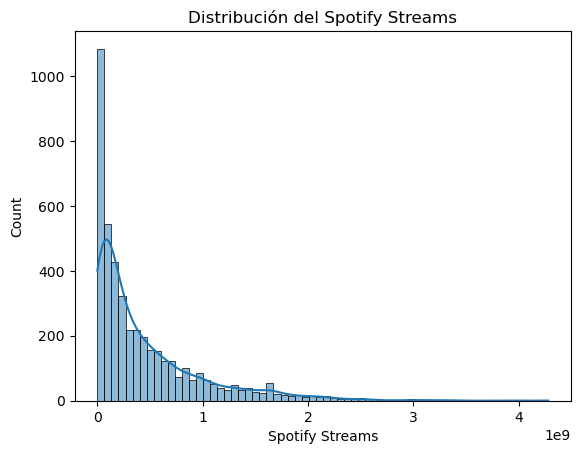

ValueError: Could not interpret value `Spotify Streams_log` for `x`. An entry with this name does not appear in `data`.

In [ ]:


# Actividad Práctica 9 :: Análisis Avanzado de Spotify (Python/Orange)

# Usando el dataset de Spotify, vamos a aplicar las técnicas de transformación y análisis multivariado que acabamos de ver.

# Puedes realizar esta actividad en Python o en Orange, como prefieras.

# Asimetría (Log Transform):

# Visualiza la distribución de `Spotify Streams` (usa un histograma). Notarás una fuerte asimetría positiva.

# Histograma de `Spotify Streams` 
sns.histplot(data=df, x='Spotify Streams', kde=True)
plt.title('Distribución del Spotify Streams')
plt.show()

# Crea una nueva columna, `log_streams`, aplicando `np.log()` a `Spotify Streams`.

df['log_streams'] = np.log1p(df['Spotify Streams'])

# Visualiza el histograma de `log_streams`. Compara ambos gráficos. ¿Qué patrones puedes ver ahora que antes estaban ocultos?

# Histograma de `Spotify  con log` 
sns.histplot(data=df, x='log_streams', kde=True)
plt.title('Distribución del Spotify Streams')
plt.show()

df.describe()

# Antes del log
# Muchos valores pequeños (canciones con pocos streams) se amontonan a la derecha.
# Unas pocas canciones con millones o miles de millones de streams crean una cola larga a la izquierda.
# Visualmente, todo el histograma se “aplana” y los detalles de los valores pequeños desaparecen.

# Después del log
# Los valores grandes se comprimen, los pequeños se expanden un poco.
# La distribución se ve más simétrica: se puede ver mejor la diferencia entre canciones con pocos, medios y muchos streams.
# Permite análisis estadísticos más justos.

# Correlación: Crea un mapa de calor (`heatmap`) de las principales variables numéricas (`Spotify Streams`, `Track Score`, `Danceability`, `Energy`, `Loudness`, etc.). ¿Cuáles son las correlaciones más fuertes?

cols_correlacion = [
    'Spotify Streams', 'Track Score', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity',
    'YouTube Views', 'YouTube Likes',
    'TikTok Views', 'TikTok Likes', 'TikTok Posts', 'Explicit Track'
]

# Filtrar solo las columnas que existen en el dataframe
cols_correlacion = [col for col in cols_correlacion if col in df.columns]

# Crear la matriz de correlación solo con estas columnas
corr_matrix = df[cols_correlacion].corr()

# 2. Dibujar el heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Las relaciones más fuertes son entre las mismas redes sociales comparando sus posts y likes

# Multivariado: Usa un scatter plot para ver `Year` vs. `Track Score`. Añade `Explicit Track` como el parámetro `hue`. 
# ¿Parece que las canciones explícitas tienen más o menos puntuación a lo largo de los años?

# Convertir a datetime y extraer el año
df["Release Date"] = pd.to_datetime(df["Release Date"], format="%m/%d/%Y", errors='coerce')
df["Year"] = df["Release Date"].dt.year

# Relación entre Año y Track Score, coloreada por Explicit Track
sns.scatterplot(data=df, x='Year', y='Track Score', hue='Explicit Track')

# Como conclusión, se puede observar que hay mucha mejor valoración con el paso de los años para las canciones explícitas

# Multivariado con Facetas: Ve un paso más allá. En lugar de solo usar `hue`, utiliza facetas para separar completamente los gráficos. 
# Crea un sns.relplot() que muestre la relación entre Release Date (x) y Spotify Streams (y), pero usa el parámetro col para crear columnas separadas para Explicit Track.

sns.relplot(data=df, x="Release Date", y="Spotify Streams", col="Explicit Track", kind='scatter', height=5, aspect=1.2, alpha=0.7) 
# Ajustar título general
plt.subplots_adjust(top=0.9)
plt.suptitle('Spotify Streams vs Release Date por Explicit Track', fontsize=16)

# Como se haría sin el relplot, con FacetGrid, que es lo que sale al final del temario:

# Crear FacetGrid
g = sns.FacetGrid(df, col='Explicit Track', height=5, aspect=1.2)

# Mapear scatter plot
g.map(plt.scatter, 'Release Date', 'Spotify Streams', alpha=0.7)

# Ajustar etiquetas
g.set_axis_labels("Fecha de Lanzamiento", "Spotify Streams")
g.set_titles("Explicit Track = {col_name}")

# Título principal
g.fig.suptitle("Spotify Streams vs Release Date por Explicit Track", y=1.02)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

# Se puede observar que hay más canciones no explicitas que explicitas, y que las no explicitas alcancan mayores reproducciones